In [183]:
import numpy as np
import pandas as pd

from collections import Counter
import pprint

import matplotlib.pyplot as plt

from scipy import stats
import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [184]:
results = pd.read_csv("results.csv", index_col = 0)

In [185]:
results

,file,explanation_group,priming_group,participant_number,final_accuracy,ai_agreement,n_na,n_wt,n_wmt,n_ut,...,wt_ratio,total_trust,fai,com,rel,time_per_task,time_per_task_user,time_per_task_final,time_per_task_median,grad_ratio
wo_0_0,explanations_wo/0_0.csv,wo,0,0,0.466667,0.600000,7,0,1,5,...,0.000000,0.250000,-0.2,0.75,0.333333,3.353436,0.725426,2.628010,3.149200,0.600000
wo_0_1,explanations_wo/0_1.csv,wo,0,1,0.800000,0.800000,9,2,2,1,...,0.666667,-0.250000,-1.0,0.25,0.333333,4.425740,1.346242,3.079498,2.602590,0.666667
wo_0_3,explanations_wo/0_3.csv,wo,0,3,0.866667,0.733333,10,1,3,1,...,0.500000,-0.666667,-1.0,-0.50,-0.333333,6.221536,1.325001,4.896535,3.184887,0.600000
wo_0_4,explanations_wo/0_4.csv,wo,0,4,1.000000,0.733333,10,1,4,0,...,1.000000,0.000000,-0.4,0.25,0.333333,8.652404,0.962349,7.690055,1.866513,0.733333
wo_0_5,explanations_wo/0_5.csv,wo,0,5,0.800000,0.800000,8,3,2,1,...,0.750000,0.583333,0.8,0.50,0.333333,6.889090,2.224270,4.664820,4.470461,0.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
w_1_74,explanations_w/1_74.csv,w,1,74,0.866667,0.733333,0,10,3,1,...,0.909091,-1.500000,-0.8,-2.00,-2.000000,2.174590,NaN,NaN,1.094533,0.866667
w_1_75,explanations_w/1_75.csv,w,1,75,0.733333,0.733333,0,9,2,2,...,0.818182,0.250000,0.2,0.25,0.333333,3.138306,NaN,NaN,2.340623,0.733333
w_1_76,explanations_w/1_76.csv,w,1,76,0.800000,0.666667,0,9,3,2,...,0.818182,0.083333,-0.4,0.00,1.000000,2.032701,NaN,NaN,1.301402,0.933333
w_1_77,explanations_w/1_77.csv,w,1,77,0.800000,0.800000,0,10,2,1,...,0.909091,-0.333333,-0.2,-0.25,-0.666667,3.636001,NaN,NaN,2.098175,0.800000


In [186]:
results.columns

Index(['file', 'explanation_group', 'priming_group', 'participant_number',
       'final_accuracy', 'ai_agreement', 'n_na', 'n_wt', 'n_wmt', 'n_ut',
       'n_ot', 'Prolific ID', 'time_taken', 'language', 'total_approvals',
       'priming', 'user_accuracy', 'AI_knowledge', 'perceived_accuracy',
       'perceived_domain_knowledge', 'switch_ratio', 'switch_not_ratio',
       'ot_ratio', 'ut_ratio', 'wt_ratio', 'total_trust', 'fai', 'com', 'rel',
       'time_per_task', 'time_per_task_user', 'time_per_task_final',
       'time_per_task_median', 'grad_ratio'],
      dtype='object')

# Methods
## Analysis

In [522]:
# descriptive stats for groups or subgroups with intervall data
# returns (mean, std) for easy graphics
def describe(column):
    print(len(column))
    print("Min:", np.min(column), "Max:", np.max(column))
    print("Mean:", np.mean(column))
    print("Std:", np.std(column))
    return(np.mean(column), np.std(column))

# descriptive stats for groups with categorical data
# basically just counts which category appears how often
def describe_cat(column):
    print(len(column))
    c = Counter(list(column))
    print(len(c.keys()), "categories")
    for item in c:
        print(item, ":", c[item])

# Stats

## Descriptive Statistics


In [188]:
df_wo = results[(results["explanation_group"] == "wo")]
df_w = results[(results["explanation_group"] == "w")]
df_wo_1 = results[(results["explanation_group"] == "wo") & (results["priming_group"]==1)]
df_wo_2 = results[(results["explanation_group"] == "wo") & (results["priming_group"]==0)]
df_w_1 = results[(results["explanation_group"] == "w") & (results["priming_group"]==1)]
df_w_2 = results[(results["explanation_group"] == "w") & (results["priming_group"]==0)]

In [189]:
df_demo_wo = pd.read_csv("demo_data_wo.csv", index_col = "Participant id")
df_demo_w = pd.read_csv("demo_data_xai.csv", index_col = "Participant id")
df_demo = pd.concat([df_demo_wo, df_demo_w])
df_demo = df_demo.drop([i for i in df_demo.index if not i in list(results["Prolific ID"])])
print(df_demo.shape)
df_demo

(298, 18)


,Submission id,Status,Started at,Completed at,Reviewed at,Archived at,Time taken,Completion code,Total approvals,Age,Sex,Ethnicity simplified,Country of birth,Country of residence,Nationality,Language,Student status,Employment status
Participant id,,,,,,,,,,,,,,,,,,
642c63f27d35b896cfbc4976,64f78c3a1f128588d084b371,APPROVED,2023-09-05T20:14:59.894000Z,2023-09-05T20:38:33.071000Z,2023-09-06T07:33:44.327000,2023-09-05T20:38:40.316993Z,1414,642c63f27d35b896cfbc4976,92,19,Male,White,Netherlands,Netherlands,Netherlands,Dutch,Yes,Unemployed (and job seeking)
5e6f58ba2649e051077d8988,64f78c41b5cb4da7fe7aa0d3,APPROVED,2023-09-05T20:14:57.310000Z,2023-09-05T20:28:16.362000Z,2023-09-05T20:28:16.965000,2023-09-05T20:28:16.902221Z,800,C13E0WG5,411,37,Male,Mixed,South Africa,South Africa,South Africa,English,DATA_EXPIRED,DATA_EXPIRED
605da94ba47f45380a1c7d57,64f78c41d10237d1e4e3d939,APPROVED,2023-09-05T20:14:57.702000Z,2023-09-05T20:22:06.433000Z,2023-09-05T20:22:07.105000,2023-09-05T20:22:07.037274Z,429,C13E0WG5,232,30,Female,White,Poland,Poland,Poland,Polish,No,Full-Time
603ea08e7dc2aaf9eb6d9225,64f78c540fe28f8105ec57e3,APPROVED,2023-09-05T20:15:16.196000Z,2023-09-05T20:23:46.436000Z,2023-09-05T20:24:04.911000Z,2023-09-05T20:24:15.886731Z,511,C13E0WG5,196,21,Female,White,South Africa,South Africa,South Africa,English,Yes,Part-Time
60f672ca5ca3b52915f16c9d,64f78c54b3d1411f234fe43e,APPROVED,2023-09-05T20:15:16.605000Z,2023-09-05T20:30:30.224000Z,2023-09-05T20:30:31.099000,2023-09-05T20:30:31.031170Z,914,C13E0WG5,70,37,Female,Black,South Africa,South Africa,South Africa,English,DATA_EXPIRED,DATA_EXPIRED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5f1398cfb075423b3da590ce,64ff7d9c0599765e89854922,APPROVED,2023-09-11T20:50:40.802000Z,2023-09-11T21:04:50.186000Z,2023-09-11T21:04:50.883000,2023-09-11T21:04:50.815876Z,850,C13E0WG5,26,21,Male,White,Mexico,Mexico,Mexico,Spanish,Yes,Part-Time
64ecd34cb2a8b9bef9c78e6e,64ff7da3a2a075ec5fef6d08,APPROVED,2023-09-11T20:51:23.685000Z,2023-09-11T21:13:00.615000Z,2023-09-11T21:13:01.617000,2023-09-11T21:13:01.538351Z,1297,C13E0WG5,2,31,Male,White,Portugal,Portugal,Portugal,Portuguese,Yes,Full-Time
5ee24db25079946d034e6a37,64ff7f328b56869d058fbb9c,APPROVED,2023-09-11T20:57:22.614000Z,2023-09-11T21:07:40.564000Z,2023-09-11T21:07:41.526000,2023-09-11T21:07:41.433468Z,618,C13E0WG5,270,31,Female,White,Portugal,Portugal,Portugal,Portuguese,DATA_EXPIRED,DATA_EXPIRED


In [190]:
# participants per group

print("w/o x, one-shot:", len(df_wo_1))
print("w/o x, two-shot:", len(df_wo_2))
print("w/ x, one-shot:", len(df_w_1))
print("w/ x, one-shot:", len(df_w_2))

w/o x, one-shot: 78
w/o x, two-shot: 72
w/ x, one-shot: 74
w/ x, one-shot: 74


In [523]:
describe(df_demo["Age"])

298
Min: 19 Max: 71
Mean: 29.06711409395973
Std: 9.192690727555558


(29.06711409395973, 9.192690727555558)

In [524]:
describe_cat(df_demo["Sex"])

298
2 categories
Male : 149
Female : 149


In [525]:
describe_cat(df_demo["Nationality"])

298
30 categories
Netherlands : 3
South Africa : 96
Poland : 50
Portugal : 35
Mexico : 23
Spain : 3
Greece : 14
United Kingdom : 16
Israel : 5
Finland : 1
Latvia : 2
Czech Republic : 3
Vietnam : 1
Italy : 17
Zimbabwe : 3
Slovenia : 1
Canada : 2
Austria : 1
United States : 4
Ireland : 1
Pakistan : 1
Chile : 4
Hungary : 3
DATA_EXPIRED : 1
Lithuania : 1
New Zealand : 3
Australia : 1
Zambia : 1
France : 1
Nigeria : 1


To summarize, we have:

- Europe: 152 = 3 + 50 + 35 + 3 + 14 + 16 + 1 + 2 + 3 + 17 + 1 + 1 + 1 + 3 + 1 + 1
- Africa: 105 = 96 + 3 + 4 + 1 + 1
- Americas: 29 = 23 + 2 + 4
- Asia (including middle east and Oceania): 11 = 5 + 1 + 1 + 3 + 1

All = 297 (missing one with expired data)

In [194]:
describe_cat(df_demo["Student status"])

298
Yes : 108
DATA_EXPIRED : 57
No : 133


In [531]:
describe_cat(results["perceived_domain_knowledge"])

298
5 categories
1 : 143
0 : 64
2 : 62
-1 : 26
-2 : 3


### Time taken

In order to compare fairly between the one-shot and two-shot setup, the times shown here are: 
- for the one-shot group, the average total time per task (time too make a decision, in general)
- for the two-shot group, the average time to make their inital decision (before seeing the AI recommendation)
- for the two-shot group, the average time to make the final decision (not including the first round where they made their initial decision)

In [529]:
describe(results["time_per_task"])
describe(results["time_taken"])

298
Min: 0.7953094323476155 Max: 88.59949011802674
Mean: 7.015500790320787
Std: 10.262966411089598
298
Min: 94 Max: 3863
Mean: 904.0872483221476
Std: 573.6319814182706


(904.0872483221476, 573.6319814182706)

In [571]:
print("Without explanation, one-shot")
time_wo_1 = describe(results[(results["explanation_group"] == "wo") & (results["priming_group"]==1)]["time_per_task"])
print("---")
print("Without explanation, two-shot, total")
time_wo_2 = describe(results[(results["explanation_group"] == "wo") & (results["priming_group"]==0)]["time_per_task"])
print("Without explanation, two-shot, first decision")
time_wo_2_user = describe(results[(results["explanation_group"] == "wo") & (results["priming_group"]==0)]["time_per_task_user"])
print("Without explanation, two-shot, second decision")
time_wo_2_final = describe(results[(results["explanation_group"] == "wo") & (results["priming_group"]==0)]["time_per_task_final"])
print("---")
print("With explanation, one-shot")
time_w_1 = describe(results[(results["explanation_group"] == "w") & (results["priming_group"]==1)]["time_per_task"])
print("---")
print("With explanation, two-shot, total")
time_w_2 = describe(results[(results["explanation_group"] == "w") & (results["priming_group"]==0)]["time_per_task"])
print("With explanation, two-shot, first decision")
time_w_2_user = describe(results[(results["explanation_group"] == "w") & (results["priming_group"]==0)]["time_per_task_user"])
print("With explanation, two-shot, second decision")
time_w_2_final = describe(results[(results["explanation_group"] == "w") & (results["priming_group"]==0)]["time_per_task_final"])

Without explanation, one-shot
78
Min: 0.7953094323476155 Max: 18.10098845163981
Mean: 2.400372254746592
Std: 2.3359997947632922
---
Without explanation, two-shot, total
72
Min: 2.32427716255188 Max: 88.59949011802674
Mean: 7.690948651675825
Std: 10.330819674593135
Without explanation, two-shot, first decision
72
Min: 0.6408679326375325 Max: 78.81702394485474
Mean: 2.9950499830422577
Std: 9.119358522273458
Without explanation, two-shot, second decision
72
Min: 1.4918359438578288 Max: 16.39576490720113
Mean: 4.695898668633567
Std: 3.0862158491834273
---
With explanation, one-shot
74
Min: 0.9142458279927572 Max: 14.843726682662965
Mean: 3.6525728642403537
Std: 2.7198786941083375
---
With explanation, two-shot, total
74
Min: 2.7897826035817466 Max: 87.40996974309286
Mean: 14.585831145552902
Std: 14.68522598323797
With explanation, two-shot, first decision
74
Min: 0.4609909693400065 Max: 72.4477686882019
Mean: 3.2822941640475856
Std: 8.643277728528252
With explanation, two-shot, second deci

In [196]:
time_w_per_shot = [time_w_1[0], time_w_2_user[0], time_w_2_final[0]]
time_wo_per_shot = [time_wo_1[0], time_wo_2_user[0], time_wo_2_final[0]]

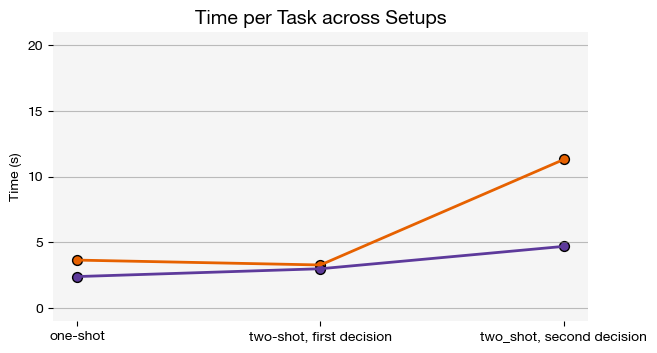

In [570]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
names = ["one-shot", "two-shot, first decision", "two_shot, second decision"]
line_w = ax.plot(names, time_w_per_shot, label = "AI with explanation", color = '#e66100', linewidth = 2)
ax.scatter(names, time_w_per_shot, color = '#e66100', edgecolors = "black", s = 50, linewidths = 1)
line_wo = ax.plot(names, time_wo_per_shot, label = "AI without explanation", color = '#5d3a9b', linewidth = 2)
ax.scatter(names, time_wo_per_shot, color = '#5d3a9b', edgecolors = "black", s = 50, linewidths = 1)

ax.set_ylim(-1,21)
ax.set_yticks([0,5,10,15,20])
#ax.legend()

ax.set_facecolor("#f5f5f5")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.yaxis.grid(True, linestyle='-', which='major', color='grey', alpha=0.5)

ax.set_ylabel("Time (s)", fontsize=10)
ax.tick_params(axis='both', which='major', labelsize=10)
    #ax.tick_params(axis='x', which='major', labelsize=10)
ax.set_title("Time per Task across Setups", fontsize=14)

fig.tight_layout(pad = 6)
plt.savefig("time_interaction_effect.png")

## Looking into hypotheses
### Is there an effect of setup on trust?
#### Step one: effect on perceived/reported trust

In [198]:
print("Without explanation, one-shot")
trust_wo_1 = describe(results[(results["explanation_group"] == "wo") & (results["priming_group"]==1)]["total_trust"])
print("---")
print("Without explanation, two-shot")
trust_wo_2 = describe(results[(results["explanation_group"] == "wo") & (results["priming_group"]==0)]["total_trust"])
print("---")
print("With explanation, one-shot")
trust_w_1 = describe(results[(results["explanation_group"] == "w") & (results["priming_group"]==1)]["total_trust"])
print("---")
print("With explanation, two-shot")
trust_w_2 = describe(results[(results["explanation_group"] == "w") & (results["priming_group"]==0)]["total_trust"])

Without explanation, one-shot
78
Min: -1.0833333333333333 Max: 1.5833333333333333
Mean: 0.24893162393162394
Std: 0.5278048108928493
---
Without explanation, two-shot
72
Min: -1.0833333333333333 Max: 2.0
Mean: 0.20254629629629628
Std: 0.5739702247018632
---
With explanation, one-shot
74
Min: -2.0 Max: 2.0
Mean: 0.09684684684684682
Std: 0.7749875310227955
---
With explanation, two-shot
74
Min: -1.75 Max: 1.9166666666666667
Mean: 0.34459459459459457
Std: 0.6091957240830338


In [199]:
model = ols('total_trust ~ C(explanation_group) + C(priming_group) + C(explanation_group):C(priming_group)', data=results).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(explanation_group),0.004697,1.0,0.011767,0.913691
C(priming_group),0.741603,1.0,1.857853,0.173916
C(explanation_group):C(priming_group),1.609974,1.0,4.033285,0.045525
Residual,117.356546,294.0,NaN,NaN


In [200]:
trust_w_per_shot = [trust_w_1[0], trust_w_2[0]]
trust_wo_per_shot = [trust_wo_1[0], trust_wo_2[0]]

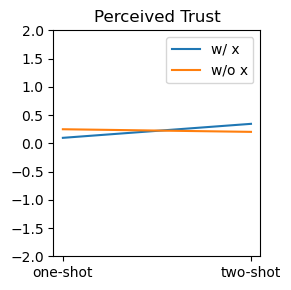

In [201]:
fig, ax = plt.subplots(1, 1, figsize=(3, 3))
names = ["one-shot", "two-shot"]
line_w = ax.plot(names, trust_w_per_shot, label = "w/ x")
line_wo = ax.plot(names, trust_wo_per_shot, label = "w/o x")
ax.set_ylim(-2,2)
ax.legend()
ax.set_title("Perceived Trust")

plt.show()

While there is no effect of either study setup or presence of explanation on the perceived trust of users, there does appear to be an interaction effect between the two. As the figure above reveals, there appears to be a very slight crossover interaction. However, correcting for multiple comparisons even this is not significant.

#### Step two: effect on actionable trust (User-AI-Agreement)

In [202]:
print("Without explanation, one-shot")
agreement_wo_1 = describe(results[(results["explanation_group"] == "wo") & (results["priming_group"]==1)]["ai_agreement"])
print("---")
print("Without explanation, two-shot")
agreement_wo_2 = describe(results[(results["explanation_group"] == "wo") & (results["priming_group"]==0)]["ai_agreement"])
print("---")
print("With explanation, one-shot")
agreement_w_1 = describe(results[(results["explanation_group"] == "w") & (results["priming_group"]==1)]["ai_agreement"])
print("---")
print("With explanation, two-shot")
agreement_w_2 = describe(results[(results["explanation_group"] == "w") & (results["priming_group"]==0)]["ai_agreement"])

Without explanation, one-shot
78
Min: 0.3333333333333333 Max: 1.0
Mean: 0.716239316239316
Std: 0.12423481921782308
---
Without explanation, two-shot
72
Min: 0.4 Max: 1.0
Mean: 0.7351851851851853
Std: 0.12569423129372828
---
With explanation, one-shot
74
Min: 0.3333333333333333 Max: 1.0
Mean: 0.7234234234234233
Std: 0.13849575071047035
---
With explanation, two-shot
74
Min: 0.5333333333333333 Max: 1.0
Mean: 0.7585585585585586
Std: 0.10552468803132485


In [203]:
model = ols('ai_agreement ~ C(explanation_group) + C(priming_group) + C(explanation_group):C(priming_group)', data=results).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(explanation_group),0.017019,1.0,1.091351,0.297030
C(priming_group),0.054237,1.0,3.477938,0.063188
C(explanation_group):C(priming_group),0.004877,1.0,0.312759,0.576418
Residual,4.584829,294.0,NaN,NaN


There is no effect of setup of explanation on actionable trust, and there is no interaction effect here.

In [83]:
agreement_w_per_shot = [agreement_w_1[0], agreement_w_2[0]]
agreement_wo_per_shot = [agreement_wo_1[0], agreement_wo_2[0]]

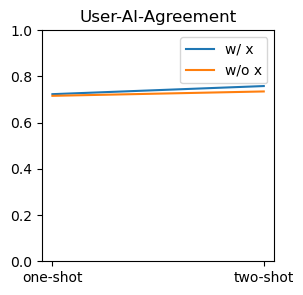

In [91]:
fig, ax = plt.subplots(1, 1, figsize=(3, 3))
names = ["one-shot", "two-shot"]
line_w = ax.plot(names, agreement_w_per_shot, label = "w/ x")
line_wo = ax.plot(names, agreement_wo_per_shot, label = "w/o x")
ax.set_ylim(0,1)
ax.legend()
ax.set_title("User-AI-Agreement")
plt.show()

### Graphics

In [223]:
hfont = {'fontname':'Helvetica'}

In [242]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica Neue']})

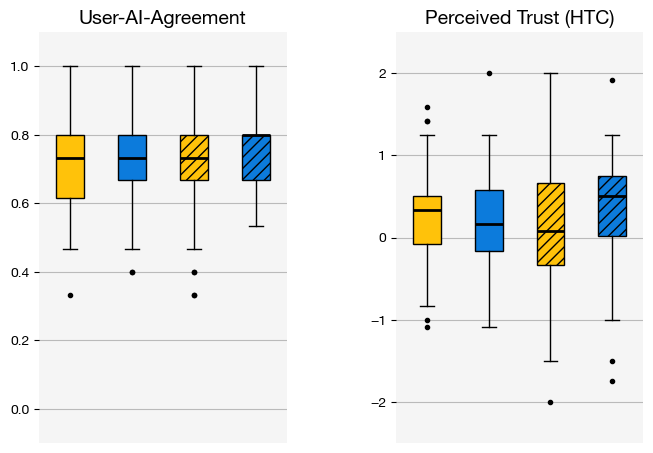

In [556]:
columns = ["ai_agreement", "total_trust"]
y_lims = [[-0.1, 1.1], [-2.5, 2.5]]
titles = ["User-AI-Agreement", "Perceived Trust (HTC)"]

fig, axs = plt.subplots(1, 2, figsize = (8,6))
for ax_i, ax in enumerate(axs):
    column = columns[ax_i]
    bp = ax.boxplot([df_wo_1[column].dropna(), df_wo_2[column].dropna(), 
                     df_w_1[column].dropna(), df_w_2[column].dropna()], 
                    patch_artist=True, flierprops = dict(marker = ".", markerfacecolor = "black"))
    ax.set_xticks([1, 2, 3, 4], 
                  labels=["w/ priming \n w/o expl.", 
                          "w/o priming \n w/o expl.", 
                          "w/ priming \n w/ expl.", 
                          "w/o priming \n w/ expl."],
                  rotation='vertical')
    ax.set_xticks([])
    
    for i, box in enumerate(bp['boxes']):
            # change outline color
        box.set(color='black', linewidth=1)
            # change fill color
        if i in [0,2]:
            box.set(facecolor = '#ffc20a' )
        else:
            box.set(facecolor = '#0c7bdc' )
            # change hatch
        if i in [2,3]:
            box.set(hatch = '///')
                
    for median in bp['medians']:
        median.set(color = 'black', linewidth = 2)
            
    ax.set_facecolor("#f5f5f5")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.yaxis.grid(True, linestyle='-', which='major', color='grey', alpha=0.5)
        
    ax.tick_params(axis='both', which='major', labelsize=10)
    ax.set_title(titles[ax_i], fontsize=14)#, fontweight='bold')
    ax.set_ylim(y_lims[ax_i][0], y_lims[ax_i][1])

fig.tight_layout(pad = 6)
plt.savefig("setup_effects_trust.png")

## Is there a Trust Paradox

We look at (on the x-axis) the actual, actionable trust and then (on the y-axis) the perceived/reported trust.
We calculate correlation seperately for those within the w/ x group and those in the w/o x group. 
This is done once for the whole cohort, with actionable trust measured as user-ai-agreement, and once only for the 2-shot participants, with actioanable trust measured as switch ratio.

In [142]:
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

In [464]:
print("Correlations")
print("--")
print("User-AI-Agreement to HTC:")
print(" - with explanations:")
print("\t", stats.pearsonr(df_w["ai_agreement"], df_w["total_trust"]))
print(" - withOUT explanations:")
print("\t", stats.pearsonr(df_wo["ai_agreement"], df_wo["total_trust"]))
print("--")
print("Switch Ratio to HTC (only for two-shot participants):")
print(" - with explanations:")
print("\t", stats.pearsonr(df_w_2["switch_ratio"], df_w_2["total_trust"]))
print(" - withOUT explanations:")
print("\t", stats.pearsonr(df_wo_2["switch_ratio"], df_wo_2["total_trust"]))

Correlations
--
User-AI-Agreement to HTC:
 - with explanations:
	 PearsonRResult(statistic=0.3316806690902933, pvalue=3.820972215583278e-05)
 - withOUT explanations:
	 PearsonRResult(statistic=0.15128215742076484, pvalue=0.06460647102456943)
--
Switch Ratio to HTC (only for two-shot participants):
 - with explanations:
	 PearsonRResult(statistic=0.30656418638364796, pvalue=0.007894208132065457)
 - withOUT explanations:
	 PearsonRResult(statistic=0.17058302511704673, pvalue=0.15196175485572871)


In [469]:
agreement_slope, agreement_intercept, agreement_r, agreement_p, agreement_stderr = stats.linregress(df_w["ai_agreement"], df_w["total_trust"])
agreement_line = f'Regression line:\ny={agreement_intercept:.2f}+{agreement_slope:.2f}x, r={agreement_r:.2f}'
agreement_line

'Regression line:\ny=-1.18+1.89x, r=0.33'

In [466]:
switch_slope, switch_intercept, switch_r, switch_p, switch_stderr = stats.linregress(df_w_2["switch_ratio"], df_w_2["total_trust"])
switch_line = f'Regression line:\ny={switch_intercept:.2f}+{switch_slope:.2f}x, r={switch_r:.2f}'
switch_line

'Regression line:\ny=0.08+0.72x, r=0.31'

Interestingly, we find that there is a correlation between user-AI-agreement and reported trust only for those who saw explanations (0.000034, well below corrected alpha); and the same is the case for the correlation between switch-ratio and reported trust.

When participants do not received explanations for AI predictions, there is no clear correlation between their trust-in-action and the trust they report. Thus, we conclude that there is indeed a trust paradox when ai suggestion is presented without justification or opportunity to follow ai reasoning.

## Graphics

(but this thime in nice)

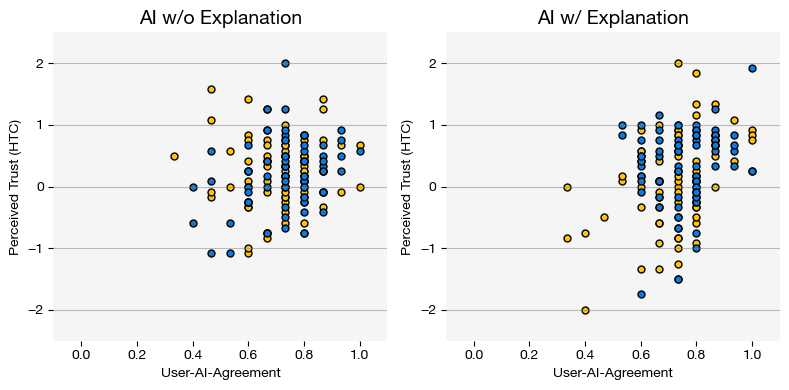

In [515]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica Neue']})

data_x_1 = [df_wo_1["ai_agreement"], df_w_1["ai_agreement"]]
data_y_1 = [df_wo_1["total_trust"], df_w_1["total_trust"]]
data_x_2 = [df_wo_2["ai_agreement"], df_w_2["ai_agreement"]]
data_y_2 = [df_wo_2["total_trust"], df_w_2["total_trust"]]
titles = ["AI w/o Explanation", "AI w/ Explanation"]

fig, axs = plt.subplots(1, 2, figsize=(8, 4))

for ax_i, ax in enumerate(axs):
    ax.scatter(data_x_1[ax_i], data_y_1[ax_i], marker=".", label="Datapoints",
               edgecolors = "black", color = "#ffc20a", s = 100, linewidths = 1)
    ax.scatter(data_x_2[ax_i], data_y_2[ax_i], marker=".", label="Datapoints",
               edgecolors = "black", color = "#0c7bdc", s = 100, linewidths = 1)
    ax.set_ylim(-2.5, 2.5)
    ax.set_xlim(-0.1, 1.1)

    #if ax_i == 1: # trend line for those with explanation
    #    ax.plot(df_w["ai_agreement"], agreement_intercept + agreement_slope * df_w["ai_agreement"], color = "black", linewidth = 1.5, label=agreement_line)

    ax.set_facecolor("#f5f5f5")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.yaxis.grid(True, linestyle='-', which='major', color='grey', alpha=0.5)

    ax.set_xlabel("User-AI-Agreement", fontsize=10)
    ax.set_ylabel("Perceived Trust (HTC)", fontsize=10)
    ax.tick_params(axis='both', which='major', labelsize=10)
    #ax.tick_params(axis='x', which='major', labelsize=10)
    ax.set_title(titles[ax_i], fontsize=14)

#fig.legend(facecolor='white', loc='outside center right')
fig.tight_layout()
plt.savefig("trust_paradox_user-ai-agreement.png")

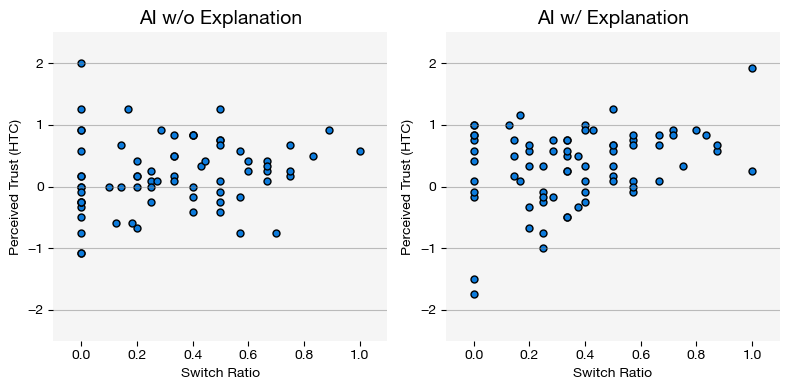

In [514]:
data_x = [df_wo_2["switch_ratio"], df_w_2["switch_ratio"]]
data_y = [df_wo_2["total_trust"], df_w_2["total_trust"]]
titles = ["AI w/o Explanation", "AI w/ Explanation"]

fig, axs = plt.subplots(1, 2, figsize=(8, 4))

for ax_i, ax in enumerate(axs):
    ax.scatter(data_x[ax_i], data_y[ax_i], marker=".", label="Datapoints",
               edgecolors = "black", color = "#0c7bdc", s = 100, linewidths = 1)
    ax.set_ylim(-2.5, 2.5)
    ax.set_xlim(-0.1, 1.1)

    #if ax_i == 1: # trend line for those with explanation
    #    ax.plot(data_x[ax_i], switch_intercept + switch_slope * data_x[ax_i], color = "black", linewidth = 1.5, label=switch_line)

    ax.set_facecolor("#f5f5f5")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.yaxis.grid(True, linestyle='-', which='major', color='grey', alpha=0.5)

    ax.set_xlabel("Switch Ratio", fontsize=10)
    ax.set_ylabel("Perceived Trust (HTC)", fontsize=10)
    ax.tick_params(axis='both', which='major', labelsize=10)
    #ax.tick_params(axis='x', which='major', labelsize=10)
    ax.set_title(titles[ax_i], fontsize=14)

#fig.legend(facecolor='white', loc='outside center right')
fig.tight_layout()
#plt.show()
plt.savefig("trust_paradox_switch-ratio.png")